# Consolidated Visualizations

In [143]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import janitor
import gc
import time
from tqdm import tqdm
import matplotlib

# Importing data
url = 'https://raw.githubusercontent.com/jnshzk/capstone/main/data/data.csv'
url_cities = 'https://raw.githubusercontent.com/jnshzk/capstone/main/data/cities.csv'
data = pd.read_csv(url)

## 1. Overall Turnout

In [144]:
# graph turnout over all states combined

# function to get all data
def get_data_all():
    data = pd.read_csv(url)

    # split by RCV and nonRCV
    RCV_cities = ['San Francisco',
         'Oakland',
         'Berkeley',
         'San Leandro',
         'Palm Desert',
         'Eureka',
         'Albany', 'Boulder','Takoma Park','Portland', 'Bloomington', 'Minneapolis', 'Minnetonka', 
         'St. Louis Park', 'Las Cruces', 'Santa Fe', 'Salt Lake City', 'Sandy', 'Lehi', 'Millcreek', 
                         'Draper', 'Riverton',  'Cottonwood Heights', 
                         'Springville', 'Midvale', 'Magna', 'South Salt Lake', 
                         'Payson', 'Bluffdale', 'Burlington', 'Heber']

    nonRCV_cities = ['Fresno',
         'San Diego',
         'Sacramento',
         'Riverside',
         'San Jose',
         'Santa Ana',
         'Anaheim',
         'Santa Rosa',
         'Merced',
         'Santa Clarita',
         'Alhambra',
         'Davis',
         'Montebello',
         'Burbank',
         'Huntington Park',
         'Bellflower',
         'Watsonville',
         'Gilroy',
         'Whittier',
         'Lynwood',
         'Lakewood',
         'Pico Rivera',
         'Lake Forest',
         'Livermore',
         'Chino Hills',
         'Paramount',
         'El Paso de Robles',
         'Pico Rivera',
         'Buena Park',
         'Whittier',
         'Calabasas',
         'Carpinteria',
         'Morro Bay',
         'San Carlos',
         'Solvang', 'Alamosa', 'Arvada', 'Brighton', 'Broomfield', 'Castle Rock', 
         'Canon City', 'Centennial', 'Commerce City', 
         'Durango', 'Englewood', 'Fountain', 'Glenwood Springs', 'Golden', 
         'Greenwood Village', 'Highlands Ranch', 'Lafayette', 
         'Littleton', 'Longmont', 'Louisville', 'Loveland', 'Montrose', 'Northglenn', 
         'Parker', 'Silverthorne', 'Steamboat Springs', 'Wheat Ridge', 'Windsor', 'Adelphi', 
                         'Annapolis', 'Aspen Hill', 'Bethesda', 
                        'Cockeysville', 'College Park', 'Easton', 
                        'Hyattsville', 'New Carrollton', 
                        'North Bethesda', 'North Potomac', 'Ocean Pines', 'Potomac', 
                        'Princess Anne', 'Severna Park', 'Timonium', 
                        'Westminster', 'Sanford', 'Westbrook', 'Lewiston', 'Wells', 'Standish', 'Waterville',
                     'Falmouth', 'Windham', 'Kennebunk', 'Scarborough', 'South Portland', 'Bangor',
                     'Augusta', 'Brunswick', 'Auburn', 'Biddeford', 'York', 'Saco',
                     'Orono', 'Gorham', 'Alexandria', 'Bemidji', 'Blaine', 'Blaine', 'Brainerd', 'Brainerd', 
                    'Brooklyn Center', 'Brooklyn Park', 'Brooklyn Park', 'Burnsville', 
                    'Coon Rapids', 'Coon Rapids', 'Duluth', 'Eagan', 'Eden Prairie', 'Eden Prairie', 
                    'Fridley', 'Inver Grove Heights', 'Mankato', 'Mankato', 'Maple Grove', 'Maplewood', 
                    'Moorhead', 'Plymouth', 'Richfield', 'Richfield', 'Rochester', 'Roseville', 
                    'Roseville', 'St. Cloud', 'St. Paul', 'Winona', 'Los Alamos', 'Albuquerque', 'Rio Rancho', 
                         'Farmington','Taos', 'Silver City', 'Roswell', 'Lovington', 'Deming',
                   'Alamogordo', 'Chaparral', 'Las Vegas', 'Los Lunas', 'Hobbs',
                   'Clovis', 'Sunland Park', 'Artesia', 'Grants', 'Carlsbad', 'Portales', 'Gallup',
                   'Espanola', 'Ogden', 'Provo', 'West Valley City', 
                                    'Logan', 'St. George', 'Taylorsville', 
                                    'Layton', 'Orem', 'South Jordan', 'Murray', 
                                    'South Jordan', 'Clearfield', 'Spanish Fork', 
                                    'Tooele', 'Kearns', 'Cedar City', 'Murray', 
                                    'Bountiful',  'South Jordan', 'Pleasant Grove', 
                                    'Vernal', 'Hurricane', 'Herriman', 'American Fork', 
                                    'Washington', 'Eagle Mountain', 'Brigham City', 
                                    'American Fork', 'Herriman', 'Spanish Fork', 
                                    'Washington', 'Hurricane', 'Vernal', 
                                    'Holladay', 'Pleasant Grove', 'American Fork', 
                                    'Herriman', 'Eagle Mountain', 'Vernal', 
                                    'Bountiful', 'Pleasant Grove', 'Washington', 
                                    'South Jordan', 'Vernal', 'Tooele', 
                                    'Spanish Fork', 'Clearfield', 'Kearns', 
                                    'Eagle Mountain', 'Washington', 'Bountiful', 
                                    'Pleasant Grove', 'Hurricane', 'Cedar City', 
                                    'Saratoga Springs', 'Kaysville', 'Brigham City', 
                                    'North Salt Lake', 'American Fork', 'Highland', 
                                    'Lindon', 'Alpine', 'West Haven', 'North Logan','South Burlington', 
                         'Essex', 'Rutland', 'Bennington', 'Milton',
                        'Essex Junction', 'Barre', 'Colchester', 'Brattleboro']

    # calc overall turnout
    data['overall_turnout_perc'] = data['voted_voters'] / data['voter_population']
    # fix election names for graphing
    data['elec_type'] = data['elec_type'].replace({"Local_or_Municipal": "Local or Municipal", 
                                        "Consolidated_General":"Consolidated General"})

    data_RCV = data[data['Residence_Addresses_City'].isin(RCV_cities)]
    data_nonRCV = data[data['Residence_Addresses_City'].isin(nonRCV_cities)]
    
    return (data_RCV, data_nonRCV)

# call function
(data_RCV, data_nonRCV) = get_data_all()

# get averages
avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']

# make df
df1 = avg_turnout_nonRCV.to_frame(name='avg_turnout_nonRCV')
df2 = avg_turnout_RCV.to_frame(name='avg_turnout_RCV')
df = df1.merge(df2, on='elec_type', how='outer')
df = df.reset_index()
df = df.round({'avg_turnout_nonRCV': 4})
df = df.round({'avg_turnout_RCV': 4})
df['avg_turnout_nonRCV'] = df['avg_turnout_nonRCV']*100
df['avg_turnout_RCV'] = df['avg_turnout_RCV']*100

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/1618872461.py:115: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/1618872461.py:116: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']


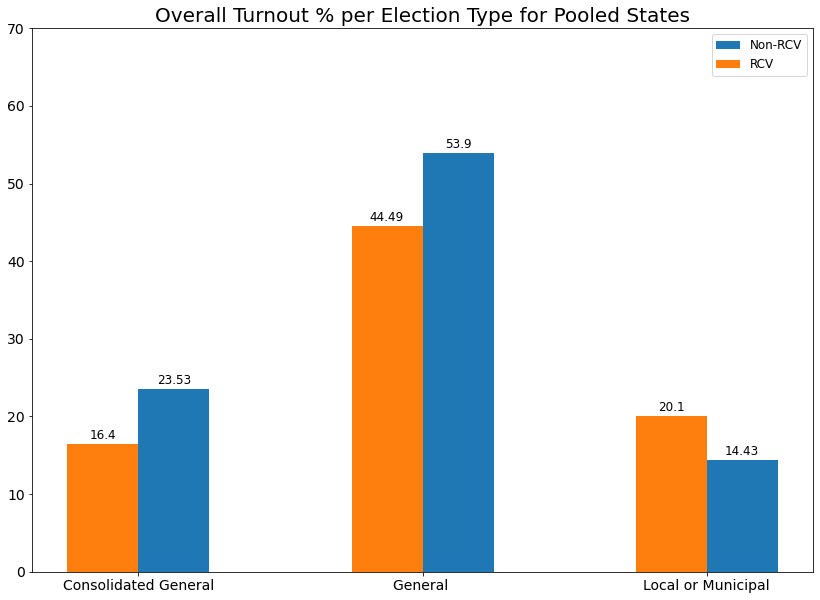

In [148]:
#plot
labels = ['Consolidated General', 'General ', 'Local or Municipal']

rcv_turnout = df['avg_turnout_RCV'].to_list()
non_rcv_turnout = df['avg_turnout_nonRCV'].to_list()

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_turnout, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_turnout, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=12)
ax.bar_label(non_rcv, padding=2, size=12)

ax.set_title("Overall Turnout % per Election Type for Pooled States", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(0, 75, 10))
ax.set_ylim([0,70])
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(prop={'size': 12})

plt.show()

## 2. Age Visualizations

### 2.1 [Average Age per Election Type and Election Date] - All Cities (RCV and Non-RCV)

In [149]:
# filtering the columns that we'll use in this section
df = data[['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type', 'mean_age', 'voted_voters', 'state']]
df['elec_type'] = df['elec_type'].replace('Consolidated_General', 'Consolidated General')
df['elec_type'] = df['elec_type'].replace('Local_or_Municipal', 'Local or Municipal')
df['elec_date'] = df['elec_date'].replace('_', '-', regex=True)

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/1778369911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elec_type'] = df['elec_type'].replace('Consolidated_General', 'Consolidated General')
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/1778369911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elec_type'] = df['elec_type'].replace('Local_or_Municipal', 'Local or Municipal')
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/1778369911.py:5

In [150]:
# Calculating the weighted average age per election date and election type
df['age_x_voters'] = df['mean_age'] * df['voted_voters']
df = df.groupby(['elec_date', 'elec_type', 'state']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df['mean_age'] = df['age_x_voters'] / df['voted_voters']
df = df.round({'mean_age': 2})

# Calculating the weighted average age per election type
df_all_elec = df.groupby(['elec_type', 'state']).agg({'voted_voters': sum, 'age_x_voters': sum}).reset_index()
df_all_elec['mean_age'] = df_all_elec['age_x_voters'] / df_all_elec['voted_voters']
del df_all_elec['age_x_voters']
df_all_elec = df_all_elec.round({'mean_age': 2})

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/2663646896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_x_voters'] = df['mean_age'] * df['voted_voters']


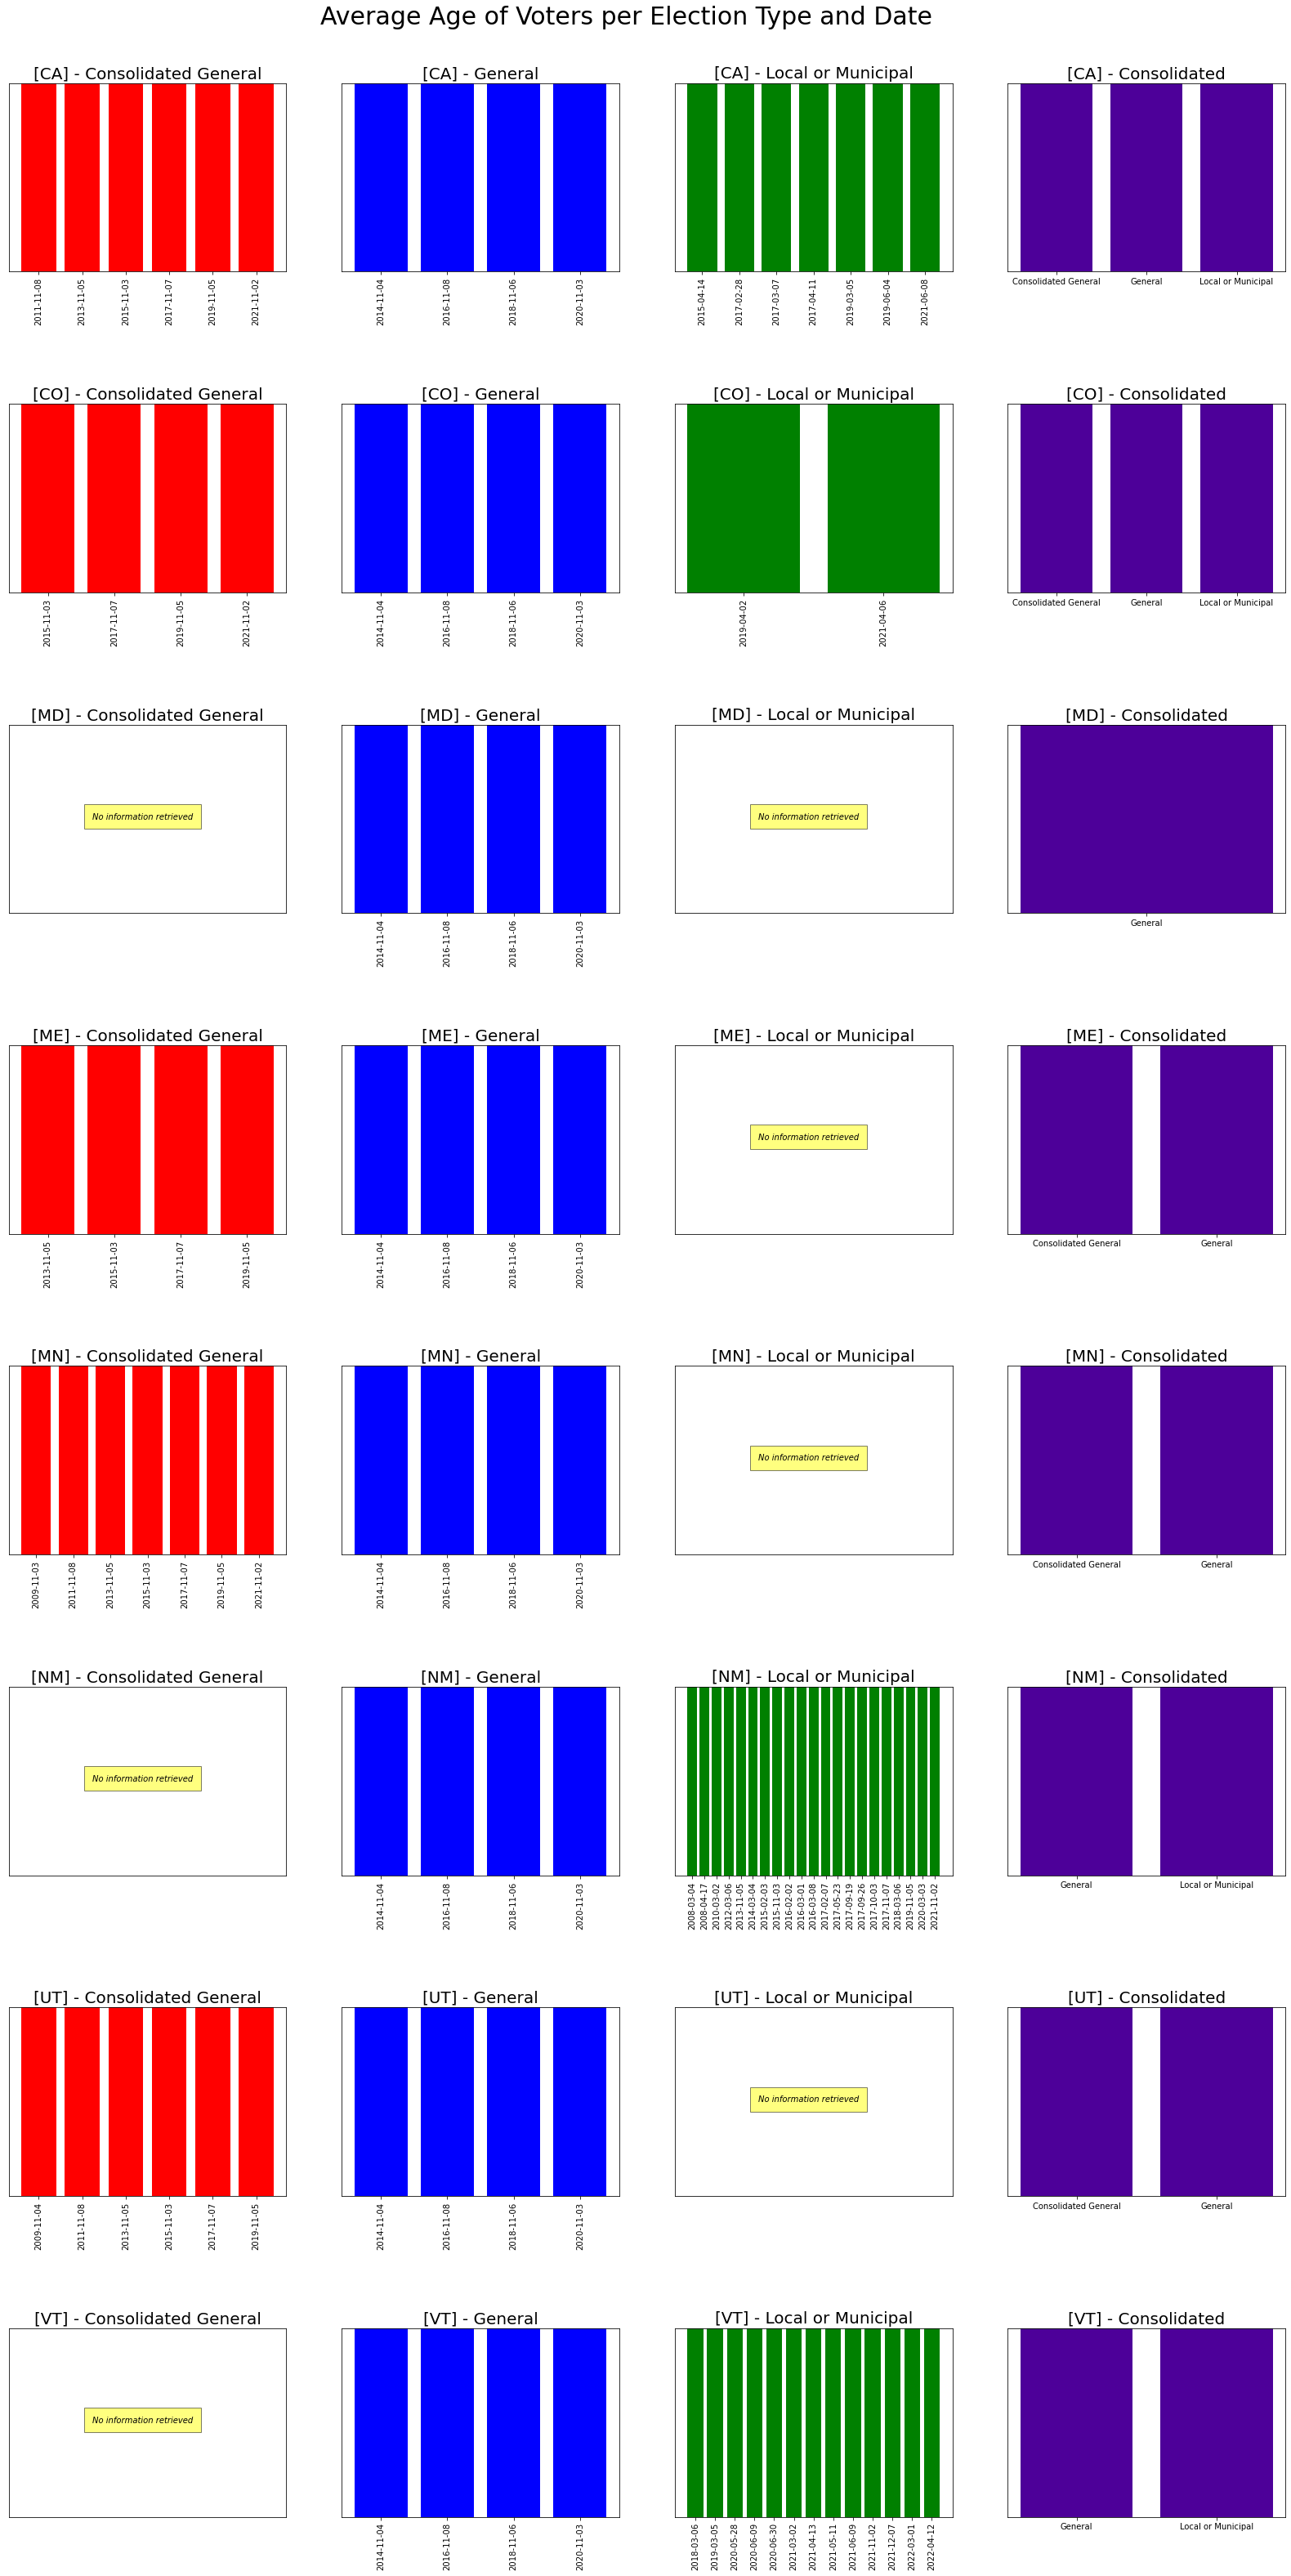

In [151]:
# ploting Graph 1. Average Age of Voters per Election Type and Date
fig, axes = plt.subplots(nrows = 8, ncols = 4, figsize = (28,44), sharey = True)

# CALIFORNIA (CA)
#axes[0,0] - California: Consolidated General per election
axes[0,0].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[0,0].set_title('[CA] - Consolidated General', fontsize=20)
axes[0,0].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[0,0].set_ylim([30,70])
axes[0,0].set_yticks(np.arange(30, 75, 5))

#axes[0,1] - California: General per election
axes[0,1].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[0,1].set_title('[CA] - General', fontsize=20)
axes[0,1].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[0,2] - California: Local or Municipal per election
axes[0,2].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[0,2].set_title('[CA] - Local or Municipal', fontsize=20)
axes[0,2].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[0,3] - California: All types of election
axes[0,3].bar(df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'CA')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[0,3].set_title('[CA] - Consolidated', fontsize=20)
axes[0,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
                   rotation='horizontal')

# COLORADO(CO)
#axes[1,0] - Colorado: Consolidated General per election
axes[1,0].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[1,0].set_title('[CO] - Consolidated General', fontsize=20)
axes[1,0].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[1,0].set_ylim([30,70])
axes[1,0].set_yticks(np.arange(30, 75, 5))

#axes[1,1] - Colorado: General per election
axes[1,1].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[1,1].set_title('[CO] - General', fontsize=20)
axes[1,1].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[1,2] - Colorado: Local or Municipal per election
axes[1,2].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[1,2].set_title('[CO] - Local or Municipal', fontsize=20)
axes[1,2].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[1,3] - Colorado: All types of election
axes[1,3].bar(df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'CO')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[1,3].set_title('[CO] - Consolidated', fontsize=20)
axes[1,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
                   rotation='horizontal')

# MARYLAND (MD)
#axes[2,0] - Maryland: Consolidated General per election
axes[2,0].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[2,0].set_title('[MD] - Consolidated General', fontsize=20)
axes[2,0].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[2,0].set_ylim([30,70])
axes[2,0].set_yticks(np.arange(30, 75, 5))
axes[2,0].axis([0, 10, 0, 10])
axes[2,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

#axes[2,1] - Maryland: General per election
axes[2,1].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[2,1].set_title('[MD] - General', fontsize=20)
axes[2,1].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[2,2] - Maryland: Local or Municipal per election
axes[2,2].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[2,2].set_title('[MD] - Local or Municipal', fontsize=20)
axes[2,2].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[2,2].axis([0, 10, 0, 10])
axes[2,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[2,3] - Maryland: All types of election
axes[2,3].bar(df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'MD')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[2,3].set_title('[MD] - Consolidated', fontsize=20)
axes[2,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
                   rotation='horizontal')

# MAINE (ME)
#axes[3,0] - Maine: Consolidated General per election
axes[3,0].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[3,0].set_title('[ME] - Consolidated General', fontsize=20)
axes[3,0].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[3,0].set_ylim([30,70])
axes[3,0].set_yticks(np.arange(30, 75, 5))

#axes[3,1] - Maine: General per election
axes[3,1].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[3,1].set_title('[ME] - General', fontsize=20)
axes[3,1].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[3,2] - Maine: Local or Municipal per election
axes[3,2].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[3,2].set_title('[ME] - Local or Municipal', fontsize=20)
axes[3,2].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[3,2].axis([0, 10, 0, 10])
axes[3,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[3,3] - Maine: All types of election
axes[3,3].bar(df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'ME')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[3,3].set_title('[ME] - Consolidated', fontsize=20)
axes[3,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
                   rotation='horizontal')

# MINNESOTA (MN)
#axes[4,0] - Minnesota: Consolidated General per election
axes[4,0].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[4,0].set_title('[MN] - Consolidated General', fontsize=20)
axes[4,0].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[4,0].set_ylim([30,70])
axes[4,0].set_yticks(np.arange(30, 75, 5))

#axes[4,1] - Minnesota: General per election
axes[4,1].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[4,1].set_title('[MN] - General', fontsize=20)
axes[4,1].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[4,2] - Minnesota: Local or Municipal per election
axes[4,2].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[4,2].set_title('[MN] - Local or Municipal', fontsize=20)
axes[4,2].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[4,2].axis([0, 10, 0, 10])
axes[4,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[4,3] - Minnesota: All types of election
axes[4,3].bar(df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'MN')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[4,3].set_title('[MN] - Consolidated', fontsize=20)
axes[4,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
                   rotation='horizontal')

# NEW MEXICO (NM)
#axes[5,0] - New Mexico: Consolidated General per election
axes[5,0].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[5,0].set_title('[NM] - Consolidated General', fontsize=20)
axes[5,0].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[5,0].set_ylim([30,70])
axes[5,0].set_yticks(np.arange(30, 75, 5))
axes[5,0].axis([0, 10, 0, 10])
axes[5,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[5,1] - New Mexico: General per election
axes[5,1].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[5,1].set_title('[NM] - General', fontsize=20)
axes[5,1].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[5,2] - New Mexico: Local or Municipal per election
axes[5,2].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[5,2].set_title('[NM] - Local or Municipal', fontsize=20)
axes[5,2].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[5,3] - New Mexico: All types of election
axes[5,3].bar(df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'NM')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[5,3].set_title('[NM] - Consolidated', fontsize=20)
axes[5,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
                   rotation='horizontal')

# UTAH (UT)
#axes[6,0] - Utah: Consolidated General per election
axes[6,0].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[6,0].set_title('[UT] - Consolidated General', fontsize=20)
axes[6,0].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[6,0].set_ylim([30,70])
axes[6,0].set_yticks(np.arange(30, 75, 5))

#axes[6,1] - Utah: General per election
axes[6,1].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[6,1].set_title('[UT] - General', fontsize=20)
axes[6,1].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[6,2] - Utah: Local or Municipal per election
axes[6,2].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[6,2].set_title('[UT] - Local or Municipal', fontsize=20)
axes[6,2].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[6,2].axis([0, 10, 0, 10])
axes[6,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[6,3] - Utah: All types of election
axes[6,3].bar(df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'UT')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[6,3].set_title('[UT] - Consolidated', fontsize=20)
axes[6,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
                   rotation='horizontal')

# VERMONT (VT)
#axes[7,0] - Vermont: Consolidated General per election
axes[7,0].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[7,0].set_title('[VT] - Consolidated General', fontsize=20)
axes[7,0].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[7,0].set_ylim([30,70])
axes[7,0].set_yticks(np.arange(30, 75, 5))
axes[7,0].axis([0, 10, 0, 10])
axes[7,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[7,1] - Vermont: General per election
axes[7,1].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[7,1].set_title('[VT] - General', fontsize=20)
axes[7,1].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[7,2] - Vermont: Local or Municipal per election
axes[7,2].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[7,2].set_title('[VT] - Local or Municipal', fontsize=20)
axes[7,2].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[7,3] - Vermont: All types of election
axes[7,3].bar(df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'VT')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[7,3].set_title('[VT] - Consolidated', fontsize=20)
axes[7,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
                   rotation='horizontal')

# Figure
fig.suptitle('Average Age of Voters per Election Type and Date', fontsize=30)
#fig.tight_layout() 
fig.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.7, wspace=0.2)

### 2.2 [Average Age per Election Type] - RCV vs. Non-RCV Cities

In [152]:
# List of RCV and non-RCV cities
RCV_cities_CA = ['San Francisco', 'Oakland', 'Berkeley', 'San Leandro', 'Palm Desert', 'Eureka', 'Albany']
RCV_cities_CO = ['Boulder']
RCV_cities_MD = ['Takoma Park']
RCV_cities_ME = ['Portland']
RCV_cities_MN = ['Bloomington', 'Minneapolis', 'Minnetonka', 'St. Louis Park']
RCV_cities_NM = ['Las Cruces','Santa Fe']
RCV_cities_UT = ['Salt Lake City', 'Sandy', 'Lehi', 'Millcreek', 'Draper', 'Riverton', 'Cottonwood Heights',
                 'Springville', 'Midvale', 'Magna', 'South Salt Lake', 'Payson', 'Bluffdale', 'Heber']
RCV_cities_VT = ['Burlington']

non_RCV_cities_CA = ['Fresno', 'San Diego', 'Sacramento', 'Riverside', 'San Jose', 'Santa Ana', 
                     'Anaheim', 'Santa Rosa', 'Merced', 'Santa Clarita', 'Alhambra', 'Davis', 'Montebello',
                     'Burbank', 'Huntington Park', 'Bellflower', 'Watsonville', 'Gilroy', 'Whittier', 'Lynwood',
                     'Lakewood', 'Pico Rivera', 'Lake Forest', 'Livermore', 'Chino Hills', 'Paramount',
                     'El Paso de Robles', 'Pico Rivera', 'Buena Park', 'Whittier', 'Calabasas', 'Carpinteria',
                     'Morro Bay', 'San Carlos', 'Solvang']
non_RCV_cities_CO = ['Alamosa', 'Arvada', 'Brighton', 'Broomfield', 'Castle Rock', 'Canon City', 'Centennial', 
                     'Commerce City', 'Durango', 'Englewood', 'Fountain', 'Glenwood Springs', 'Golden',
                     'Greenwood Village', 'Highlands Ranch', 'Lafayette', 'Littleton', 'Longmont', 
                     'Louisville', 'Loveland', 'Montrose', 'Northglenn', 'Parker', 'Silverthorne',
                     'Steamboat Springs', 'Wheat Ridge', 'Windsor']
non_RCV_cities_MD = ['Adelphi', 'Annapolis', 'Aspen Hill', 'Bethesda', 'Cockeysville', 'College Park', 
                     'Easton', 'Hyattsville', 'New Carrollton', 'North Bethesda', 'North Potomac', 
                     'Ocean Pines', 'Potomac', 'Princess Anne', 'Severna Park', 'Timonium', 'Westminster']
non_RCV_cities_ME = ['Sanford', 'Westbrook', 'Lewiston', 'Wells', 'Standish', 'Waterville', 'Falmouth', 
                     'Windham', 'Kennebunk', 'Scarborough', 'South Portland', 'Bangor', 'Augusta', 'Brunswick',
                     'Auburn', 'Biddeford', 'York', 'Saco', 'Orono', 'Gorham']
non_RCV_cities_MN = ['Alexandria', 'Bemidji', 'Blaine', 'Brainerd', 'Brooklyn Center', 'Brooklyn Park', 
                     'Burnsville', 'Coon Rapids', 'Duluth', 'Eagan', 'Eden Prairie', 'Fridley', 
                     'Inver Grove Heights', 'Mankato', 'Maple Grove', 'Maplewood', 'Moorhead', 
                     'Plymouth', 'Richfield', 'Rochester', 'Roseville', 'St. Cloud', 'St. Paul', 'Winona']
non_RCV_cities_NM = ['Los Alamos', 'Albuquerque', 'Rio Rancho', 'Farmington', 'Taos', 'Silver City', 'Roswell',
                     'Lovington', 'Deming', 'Alamogordo', 'Chaparral', 'Las Vegas', 'Los Lunas', 'Hobbs',
                     'Clovis', 'Sunland Park', 'Artesia', 'Grants', 'Carlsbad', 'Portales', 'Gallup', 'Espanola']
non_RCV_cities_UT = ['Ogden', 'Provo', 'West Valley City', 'Logan', 'St. George', 'Taylorsville', 'Layton',
                     'Orem', 'South Jordan', 'Murray', 'Clearfield', 'Spanish Fork', 'Tooele', 'Kearns',
                     'Cedar City', 'Murray', 'Bountiful', 'South Jordan', 'Pleasant Grove', 'Vernal',
                     'Hurricane', 'Herriman', 'American Fork', 'Washington', 'Eagle Mountain', 'Brigham City',
                     'Vernal', 'Holladay', 'Saratoga Springs', 'Kaysville', 'North Salt Lake', 
                     'Highland', 'Lindon', 'Alpine', 'West Haven', 'North Logan']
non_RCV_cities_VT = ['South Burlington', 'Essex', 'Rutland', 'Bennington', 'Milton', 'Essex Junction',
                     'Barre', 'Colchester', 'Brattleboro']

In [153]:
df_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(RCV_cities_CA)]
df_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(RCV_cities_CO)]
df_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(RCV_cities_MD)]
df_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(RCV_cities_ME)]
df_rcv_MN = data[data['state'] == 'MN'][data['Residence_Addresses_City'].isin(RCV_cities_MN)]
df_rcv_NM = data[data['state'] == 'NM'][data['Residence_Addresses_City'].isin(RCV_cities_NM)]
df_rcv_UT = data[data['state'] == 'UT'][data['Residence_Addresses_City'].isin(RCV_cities_UT)]
df_rcv_VT = data[data['state'] == 'VT'][data['Residence_Addresses_City'].isin(RCV_cities_VT)]
df_rcv = pd.concat([df_rcv_CA, df_rcv_CO, df_rcv_MD, df_rcv_ME, df_rcv_MN, df_rcv_NM, df_rcv_UT, df_rcv_VT], ignore_index = True)
df_rcv['age_x_voters'] = df_rcv['mean_age'] * df_rcv['voted_voters']
df_rcv = df_rcv.groupby(['state', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_rcv['mean_age'] = df_rcv['age_x_voters'] / df_rcv['voted_voters']
df_rcv = df_rcv.round({'mean_age': 2})

df_rcv_all = df_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_rcv_all['mean_age'] = df_rcv_all['age_x_voters'] / df_rcv_all['voted_voters']
df_rcv_all = df_rcv_all.round({'mean_age': 2})

df_non_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(non_RCV_cities_CA)]
df_non_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(non_RCV_cities_CO)]
df_non_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(non_RCV_cities_MD)]
df_non_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(non_RCV_cities_ME)]
df_non_rcv_MN = data[data['state'] == 'MN'][data['Residence_Addresses_City'].isin(non_RCV_cities_MN)]
df_non_rcv_NM = data[data['state'] == 'NM'][data['Residence_Addresses_City'].isin(non_RCV_cities_NM)]
df_non_rcv_UT = data[data['state'] == 'UT'][data['Residence_Addresses_City'].isin(non_RCV_cities_UT)]
df_non_rcv_VT = data[data['state'] == 'VT'][data['Residence_Addresses_City'].isin(non_RCV_cities_VT)]
df_non_rcv = pd.concat([df_non_rcv_CA, df_non_rcv_CO, df_non_rcv_MD, df_non_rcv_ME, df_non_rcv_MN, df_non_rcv_NM, df_non_rcv_UT, df_non_rcv_VT], ignore_index = True)
df_non_rcv['age_x_voters'] = df_non_rcv['mean_age'] * df_non_rcv['voted_voters']
df_non_rcv = df_non_rcv.groupby(['state', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_non_rcv['mean_age'] = df_non_rcv['age_x_voters'] / df_non_rcv['voted_voters']
df_non_rcv = df_non_rcv.round({'mean_age': 2})

df_non_rcv_all = df_non_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_non_rcv_all['mean_age'] = df_non_rcv_all['age_x_voters'] / df_non_rcv_all['voted_voters']
df_non_rcv_all = df_non_rcv_all.round({'mean_age': 2})

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/2078730753.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(RCV_cities_CA)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/2078730753.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(RCV_cities_CO)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/2078730753.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(RCV_cities_MD)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_14673/2078730753.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(

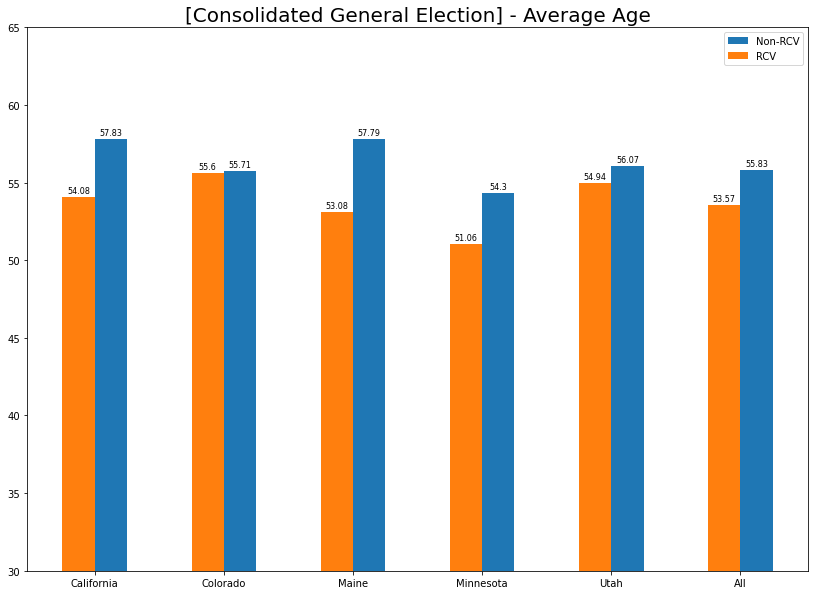

In [154]:
labels = ['California', 'Colorado', 'Maine', 'Minnesota',  'Utah', 'All']

rcv_con_gen = df_rcv[df_rcv['elec_type'] == 'Consolidated_General']['mean_age'].to_list()
rcv_con_gen.append(df_rcv_all['mean_age'][0])
non_rcv_con_gen = df_non_rcv[df_non_rcv['elec_type'] == 'Consolidated_General']['mean_age'].to_list()
non_rcv_con_gen.append(df_non_rcv_all['mean_age'][0])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_con_gen, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_con_gen, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[Consolidated General Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

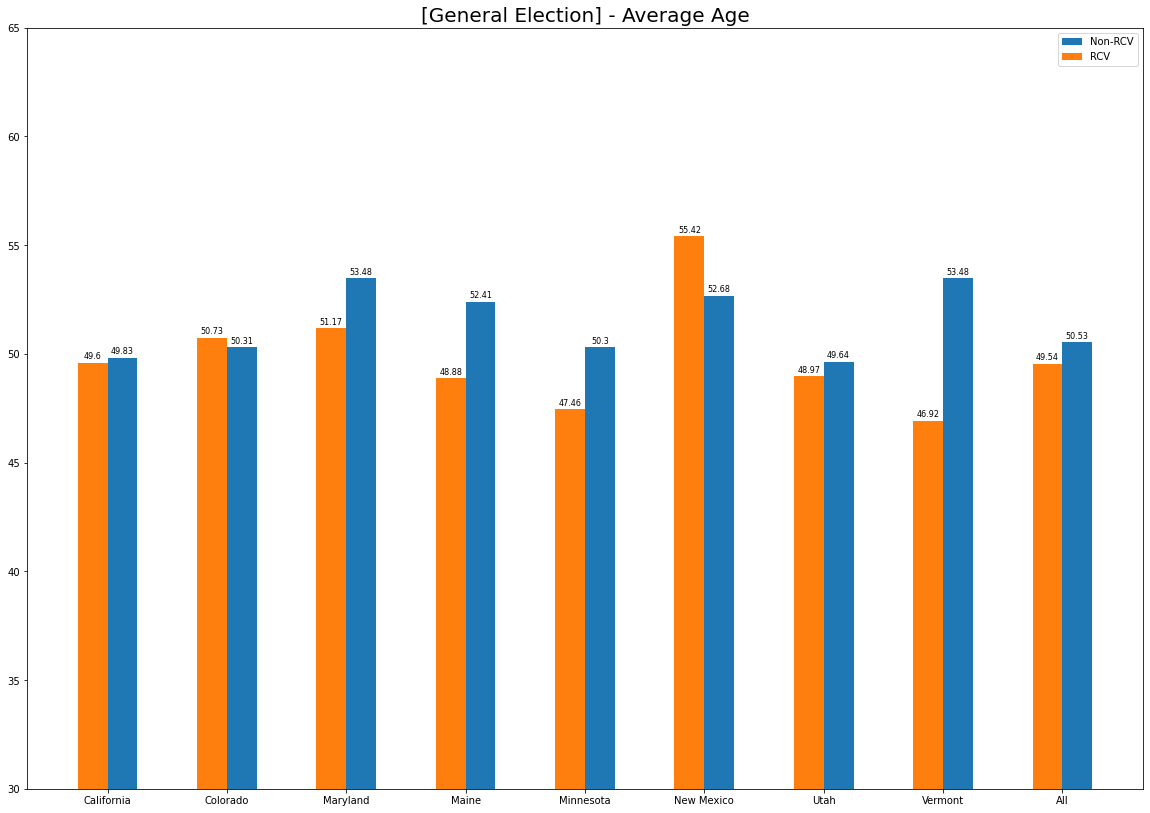

In [155]:
labels = ['California', 'Colorado', 'Maryland', 'Maine', 'Minnesota', 'New Mexico', 'Utah', 'Vermont', 'All']

rcv_gen = df_rcv[df_rcv['elec_type'] == 'General']['mean_age'].to_list()
rcv_gen.append(df_rcv_all['mean_age'][1])
non_rcv_gen = df_non_rcv[df_non_rcv['elec_type'] == 'General']['mean_age'].to_list()
non_rcv_gen.append(df_non_rcv_all['mean_age'][1])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (20,14))

non_rcv = ax.bar(x + width/2, non_rcv_gen, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_gen, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[General Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

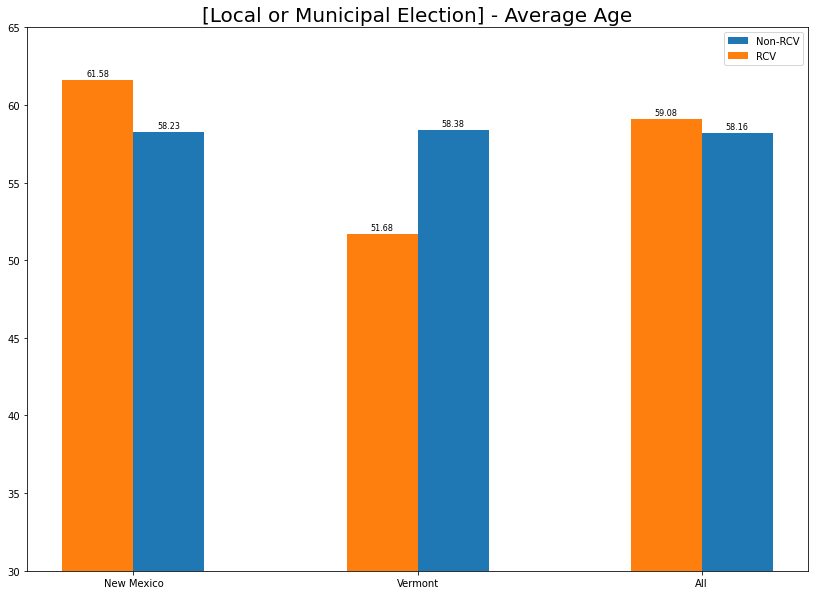

In [156]:
labels = ['New Mexico', 'Vermont', 'All']

rcv_local = df_rcv[df_rcv['elec_type'] == 'Local_or_Municipal']['mean_age'].to_list()
rcv_local.append(df_rcv_all['mean_age'][2])
non_rcv_local = df_non_rcv[df_non_rcv['elec_type'] == 'Local_or_Municipal'].drop(index=[2, 5])
non_rcv_local = non_rcv_local['mean_age'].to_list()
non_rcv_local.append(df_non_rcv_all['mean_age'][2])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_local, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_local, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[Local or Municipal Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

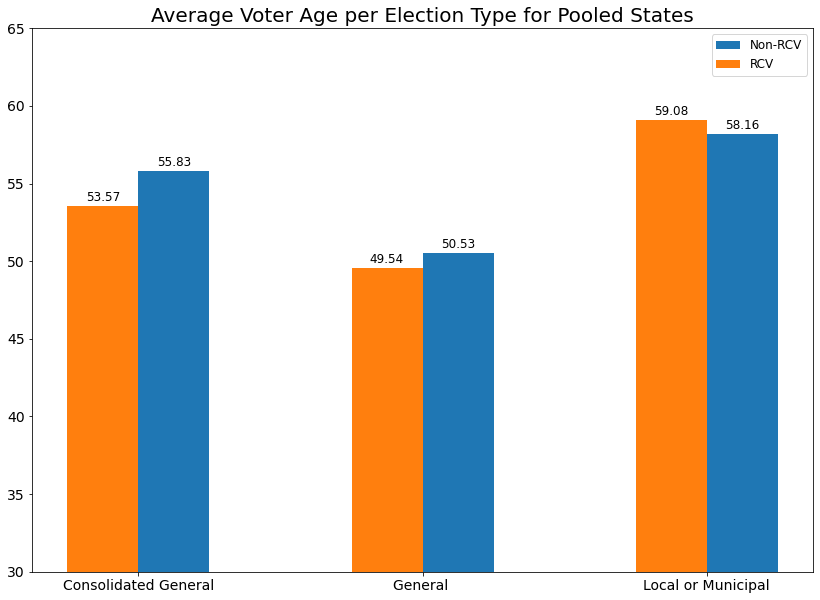

In [159]:
labels = ['Consolidated General', 'General ', 'Local or Municipal']

rcv_all = df_rcv_all['mean_age'].to_list()
non_rcv_all = df_non_rcv_all['mean_age'].to_list()

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_all, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_all, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=12)
ax.bar_label(non_rcv, padding=2, size=12)

ax.set_title("Average Voter Age per Election Type for Pooled States", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(prop={'size': 12})

plt.show()

## 3. Income Visualizations

In [160]:
#importing data
df = pd.read_csv(url)

#fill missing vals with zeros
df = df.fillna(0)

In [161]:
#breakout data by election type
consolidated_general_df = df[df['elec_type']=='Consolidated_General']
general_df = df[df['elec_type']=='General']
local_municipal_df = df[df['elec_type']=='Local_or_Municipal']

In [162]:
#select income cols
ordered_income_cols = ['voted_voters_$1000-14999',
                      'voted_voters_$15000-24999',
                      'voted_voters_$25000-34999',
                      'voted_voters_$35000-49999',
                      'voted_voters_$50000-74999',
                      'voted_voters_$75000-99999',
                      'voted_voters_$100000-124999',
                      'voted_voters_$125000-149999',
                      'voted_voters_$150000-174999',
                      'voted_voters_$175000-199999',
                      'voted_voters_$200000-249999',
                      'voted_voters_$250000+']

general_df = general_df[ordered_income_cols]

#create lookup with stand-in values for each bracket
income_lookup = {'voted_voters_$1000-14999': 10000,
                      'voted_voters_$15000-24999': 20000,
                      'voted_voters_$25000-34999': 30000,
                      'voted_voters_$35000-49999': 40000,
                      'voted_voters_$50000-74999': 62500,
                      'voted_voters_$75000-99999': 87500,
                      'voted_voters_$100000-124999': 112500,
                      'voted_voters_$125000-149999': 137500,
                      'voted_voters_$150000-174999': 162500,
                      'voted_voters_$175000-199999': 187500,
                      'voted_voters_$200000-249999': 212500,
                      'voted_voters_$250000+': 262500}

In [163]:
#function to turn counts by category into a list that can be used for boxplots
def get_incomes_list(df):
    output = []
    for col in tqdm(ordered_income_cols):
        val = income_lookup[col]
        for count in df[col]:
            for _ in range(int(count)):
                output.append(val)
    return output

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 328.80it/s]


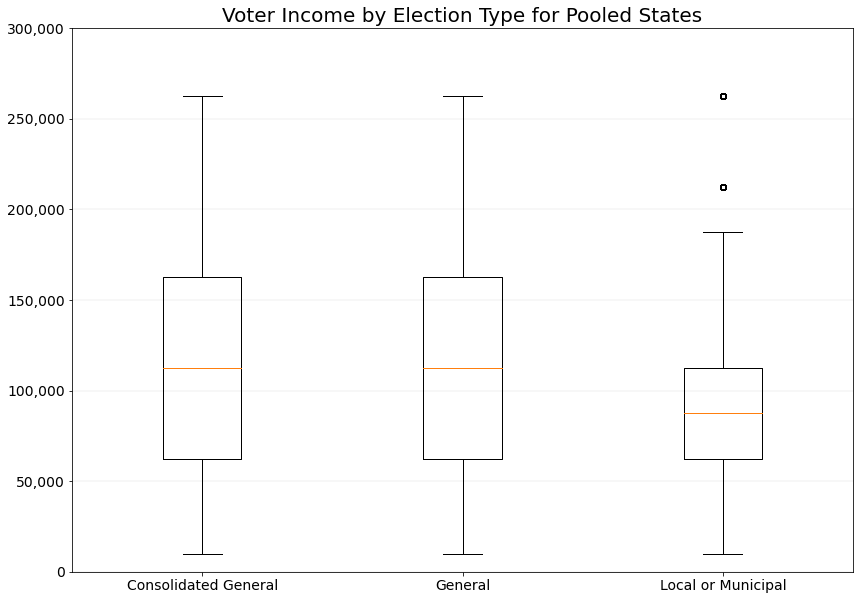

In [164]:
#boxplots for income by election type

fig, ax = plt.subplots(figsize=(14, 10))

ax.set_title('Voter Income by Election Type for Pooled States', size=20)
ax.set_yticks(np.arange(0, 350000, 50000))
ax.set_ylim([0,300000])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

consolidated_general_incomes = get_incomes_list(consolidated_general_df)
general_incomes = get_incomes_list(general_df)
local_municipal_incomes = get_incomes_list(local_municipal_df)

plot_vals = [consolidated_general_incomes, general_incomes, local_municipal_incomes]

ax.boxplot(plot_vals, labels = ['Consolidated General', 'General', 'Local or Municipal'])

plt.show()

In [165]:
#breakout data by rcv vs. non-rcv
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro',
             'Las Cruces', 'Santa Fe', 'Boulder', 'Burlington', 'Portland', 'Takoma Park', 'Bluffdale',
             'Payson', 'Cottonwood Heights', 'Salt Lake City', 'Sandy', 'Midvale', 'Draper', 'Lehi',
             'Springville', 'South Salt Lake', 'Magna', 'Heber', 'Millcreek', 'Riverton', 'St. Louis Park',
             'Bloomington', 'Minneapolis', 'Minnetonka']
non_rcv_cities = list(set(df['Residence_Addresses_City']) - set(rcv_cities))

rcv_df = df[df['Residence_Addresses_City'].isin(rcv_cities)]
non_rcv_df = df[df['Residence_Addresses_City'].isin(non_rcv_cities)]

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 12.30it/s]


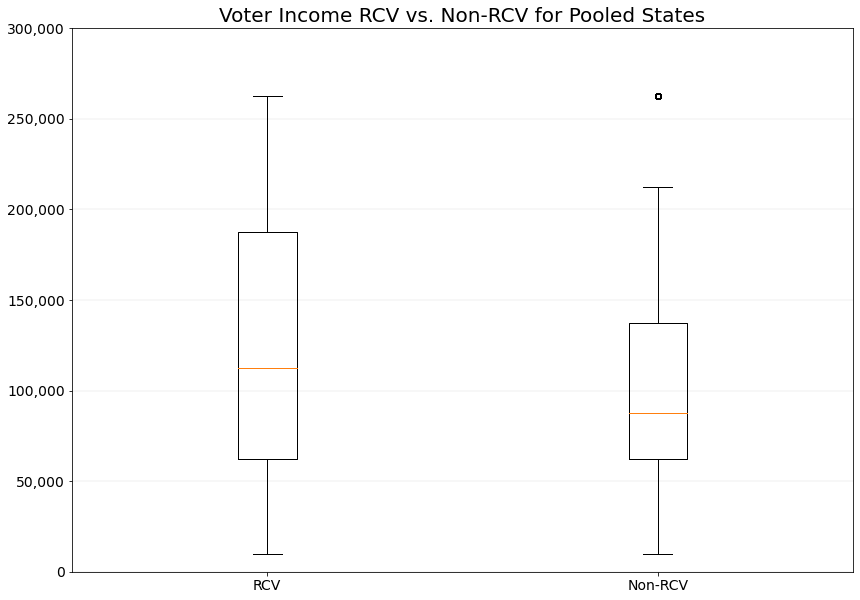

In [166]:
#boxplots for income (rcv vs. non-rcv)
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_title('Voter Income RCV vs. Non-RCV for Pooled States', size=20)
ax.set_yticks(np.arange(0, 350000, 50000))
ax.set_ylim([0,300000])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rcv_incomes = get_incomes_list(rcv_df)
non_rcv_incomes = get_incomes_list(non_rcv_df)

plot_vals = [rcv_incomes, non_rcv_incomes]

ax.boxplot(plot_vals, labels = ['RCV', 'Non-RCV'])

plt.show()

## 4. Race/Ethnical Visualizations

In [167]:
CA_get_rcv_nonrcv = pd.read_csv(url_cities, usecols = ['RCV', 'city_ascii', 'state_id'])
All_rcv_nonrcv = pd.read_csv(url_cities, usecols = ['RCV', 'city_ascii', 'state_id'])
All_rcv_nonrcv = pd.concat([All_rcv_nonrcv, CA_get_rcv_nonrcv])
All_rcv_nonrcv = All_rcv_nonrcv.rename(columns ={"city_ascii": "Residence_Addresses_City", "state_id":"state"})
All_rcv_nonrcv['RCV'] = All_rcv_nonrcv['RCV'].fillna(0) 
All_rcv_nonrcv = All_rcv_nonrcv.drop_duplicates()

cnt_multiple = All_rcv_nonrcv.groupby(['Residence_Addresses_City', 'state']).size().reset_index()
cnt_multiple.columns = ['Residence_Addresses_City', 'state', 'count']

In [168]:
voter_turnout_merge = pd.read_csv(url)
voter_turnout_merge = voter_turnout_merge.merge(All_rcv_nonrcv, on = ["Residence_Addresses_City", "state"], how = "inner")
voter_turnout_merge = voter_turnout_merge.replace({"Local_or_Municipal": "Local or Municipal", 
                                        "Consolidated_General":"Consolidated General"})

In [169]:
# perc_turnout_asian and other races are calculated per election date, election type and city level
# we want to aggregate at election type level and city level, so remove the those columns

def select_cols(df):
    select_df = df[[col for col in df.columns\
                    if "RCV" in col or\
                    "elec_type" in col or\
                    "voters_asian" in col or\
                    "voters_black" in col or\
                    "voters_hispanic" in col or\
                    "voters_white" in col or\
                    "voters_others" in col or\
                    "perc_turnout_asian"  in col or\
                    "perc_turnout_black"  in col or\
                    "perc_turnout_hispanic"  in col or\
                    "perc_turnout_white"  in col or\
                    "perc_turnout_others"  in col 
                   ]]
    return select_df

### 4.1 Average turnout for white, black, Hispanic, and Asian voters in local, consolidated, and general elections

In [170]:
def get_elec_turnout_race(df, RCV_nonRCV = False):
    if RCV_nonRCV == False:
        agg_df = df[[col for col in df.columns \
                        if "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby('elec_type').mean().reset_index()
    if RCV_nonRCV == True:
        agg_df = df[[col for col in df.columns \
                        if "RCV" in col or\
                        "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby(['elec_type', 'RCV']).mean().reset_index()
    return agg_df

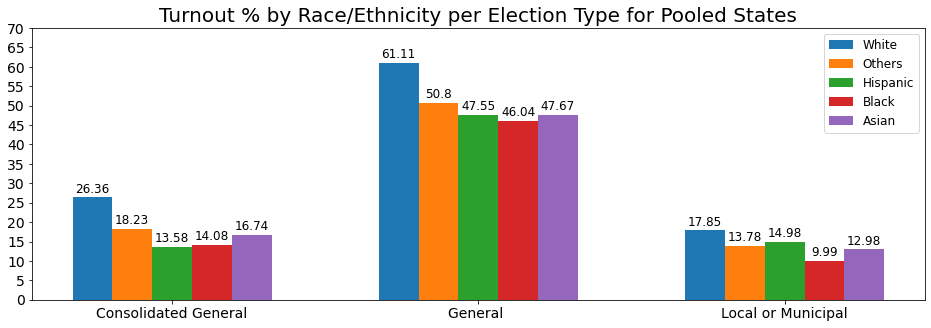

In [174]:
#Plot
voter_turnout_merge_race_all = select_cols(voter_turnout_merge)
elec_turnout_per_race_all = get_elec_turnout_race(voter_turnout_merge_race_all, RCV_nonRCV = False) 
elec_turnout_per_race_all.columns = [col.replace('perc_turnout_', '') for col in elec_turnout_per_race_all.columns]
elec_turnout_per_race_all = elec_turnout_per_race_all.round({'asian': 2,
                                                            'black': 2,
                                                            'hispanic': 2,
                                                            'others': 2,
                                                            'white': 2})

labels = ['Consolidated General', 'General ', 'Local or Municipal']

asian_turnout = elec_turnout_per_race_all['asian'].to_list()
black_turnout = elec_turnout_per_race_all['black'].to_list()
hispanic_turnout = elec_turnout_per_race_all['hispanic'].to_list()
others_turnout = elec_turnout_per_race_all['others'].to_list()
white_turnout = elec_turnout_per_race_all['white'].to_list()

x = np.arange(len(labels))
width = 0.13

fig, ax = plt.subplots(figsize = (16,5))

white = ax.bar(x - 2*width, white_turnout, width, label = 'White')
others = ax.bar(x - width, others_turnout, width, label = 'Others')
hispanic = ax.bar(x, hispanic_turnout, width, label = 'Hispanic')
black = ax.bar(x + width, black_turnout, width, label = 'Black')
asian = ax.bar(x + 2*width, asian_turnout, width, label = 'Asian')

ax.bar_label(asian, padding=2, size=12)
ax.bar_label(black, padding=2, size=12)
ax.bar_label(hispanic, padding=2, size=12)
ax.bar_label(others, padding=2, size=12)
ax.bar_label(white, padding=2, size=12)

ax.set_title("Turnout % by Race/Ethnicity per Election Type for Pooled States", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(0, 75, 5))
ax.set_ylim([0,70])
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(prop={'size': 12})

plt.show()